<img src="téléchargement.png">

# Projet 05 du parcours data scientist

## Segmentez des clients d'un site e-commerce 

<img src="olist.png">

### Objectifs 

<img src="olist2.png">

### Plan 

### I.Mise en place 

In [1]:
import pandas as pd
import numpy as np

import missingno as msn

import seaborn as sns

import matplotlib.pyplot as plt

from math import radians, cos, sin, asin, sqrt

from time import time

### II.La donnée brute 

In [2]:
df_customers = pd.read_csv('./datasets/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('./datasets/olist_geolocation_dataset.csv')
df_items = pd.read_csv('./datasets/olist_order_items_dataset.csv')
df_payments = pd.read_csv('./datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('./datasets/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('./datasets/olist_orders_dataset.csv')
df_products = pd.read_csv('./datasets/olist_products_dataset.csv')
df_sellers = pd.read_csv('./datasets/olist_sellers_dataset.csv')
df_category = pd.read_csv('./datasets/olist_product_category_name_translation.csv')

In [3]:
print(f'df_customers contient {df_customers.shape[0]} lignes et {df_customers.shape[1]} collenes')
print(f'df_geolocation contient {df_geolocation.shape[0]} lignes et {df_geolocation.shape[1]} colonnes')
print(f'df_items contient {df_items.shape[0]} lignes et {df_items.shape[1]} colonnes')
print(f'df_payments contient {df_payments.shape[0]} lignes et {df_payments.shape[1]} colonnes')
print(f'df_reviews contient {df_reviews.shape[0]} lignes et {df_reviews.shape[1]} colonnes')
print(f'df_orders contient {df_orders.shape[0]} lignes et {df_orders.shape[1]} colonnes')
print(f'df_products contient {df_products.shape[0]} lignes et {df_products.shape[1]} colonnes')
print(f'df_sellers contient {df_sellers.shape[0]} lignes et {df_sellers.shape[1]} colonnes')
print(f'df_category contient {df_category.shape[0]} lignes et {df_category.shape[1]} colonnes')

df_customers contient 99441 lignes et 5 collenes
df_geolocation contient 1000163 lignes et 5 colonnes
df_items contient 112650 lignes et 7 colonnes
df_payments contient 103886 lignes et 5 colonnes
df_reviews contient 99224 lignes et 7 colonnes
df_orders contient 99441 lignes et 8 colonnes
df_products contient 32951 lignes et 9 colonnes
df_sellers contient 3095 lignes et 4 colonnes
df_category contient 71 lignes et 2 colonnes


<img src="olist3.png">

### II.1.Clients

In [4]:
df_customers.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
df_customers.isna().mean()*100

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [8]:
df_customers.duplicated().sum()

0

In [9]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

<AxesSubplot:>

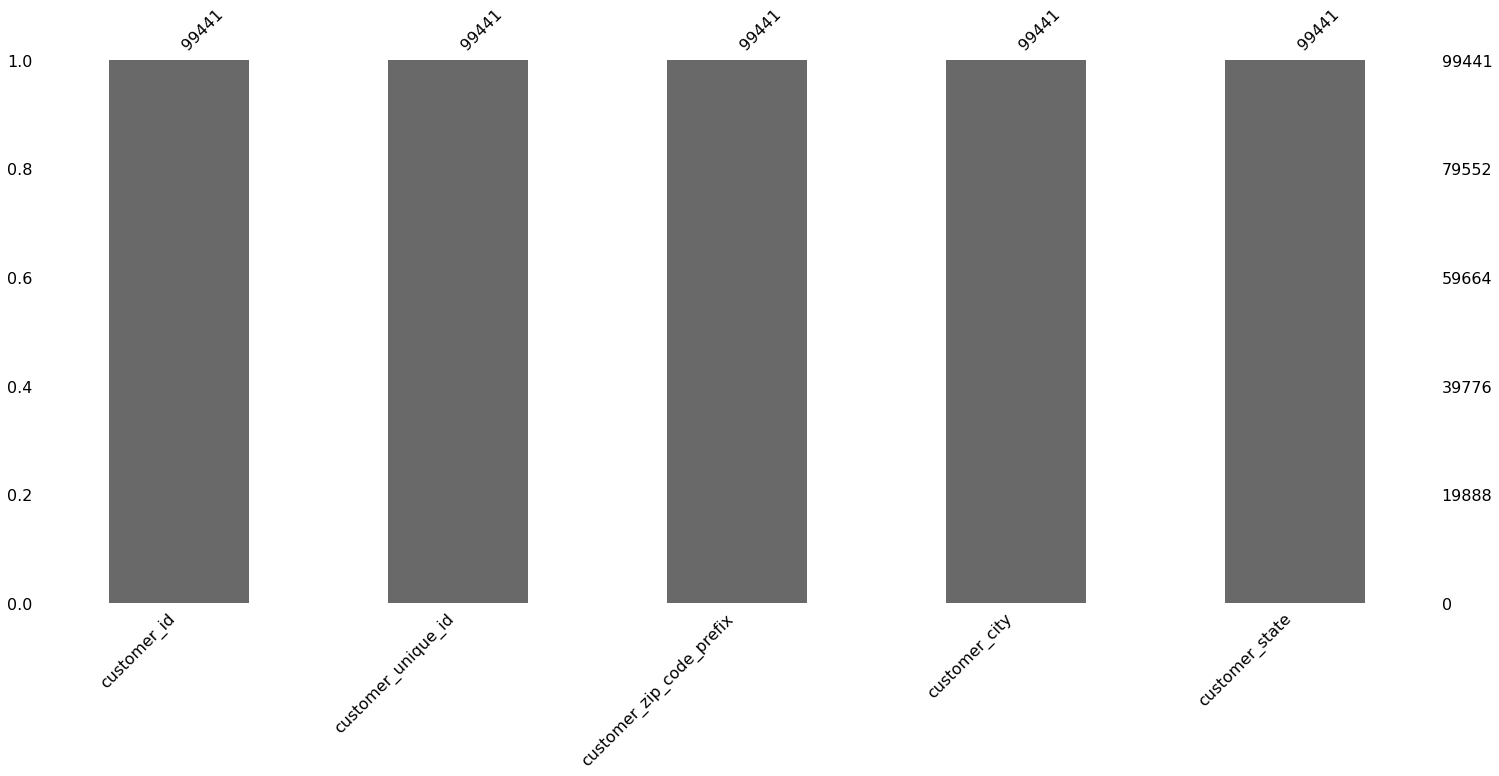

In [10]:
msn.bar(df_customers)

### II.2.Localisation

In [11]:
df_geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
df_geolocation.isna().mean()*100

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [15]:
df_geolocation.duplicated().sum()

261831

In [16]:
df_geolocation.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159     True
1000160     True
1000161    False
1000162     True
Length: 1000163, dtype: bool

In [17]:
df_geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

<AxesSubplot:>

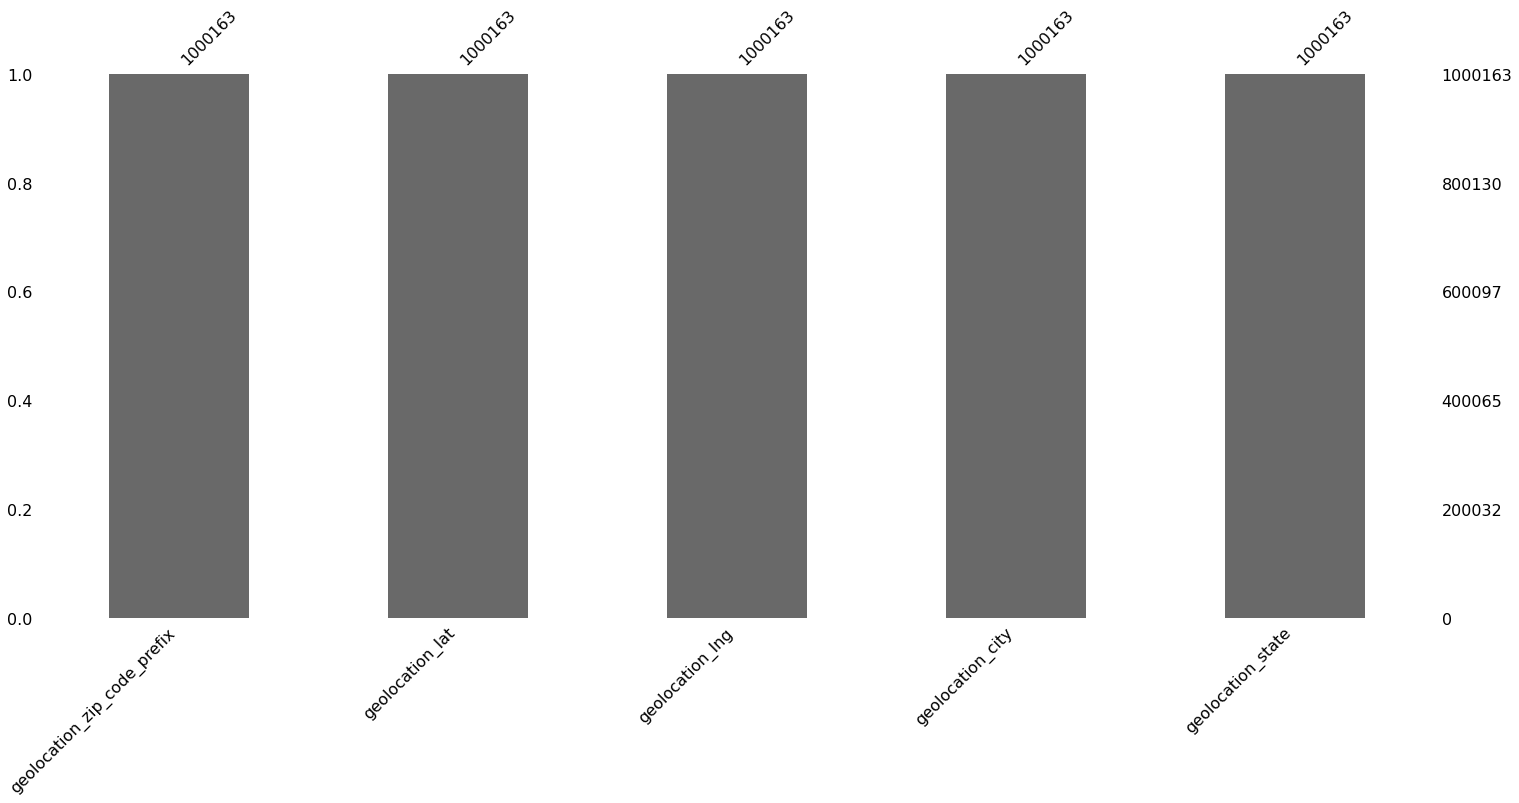

In [18]:
msn.bar(df_geolocation)

### II.3.Objets 

In [19]:
df_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
df_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
df_items.isna().mean()*100

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [23]:
df_items.duplicated().sum()

0

In [24]:
df_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

<AxesSubplot:>

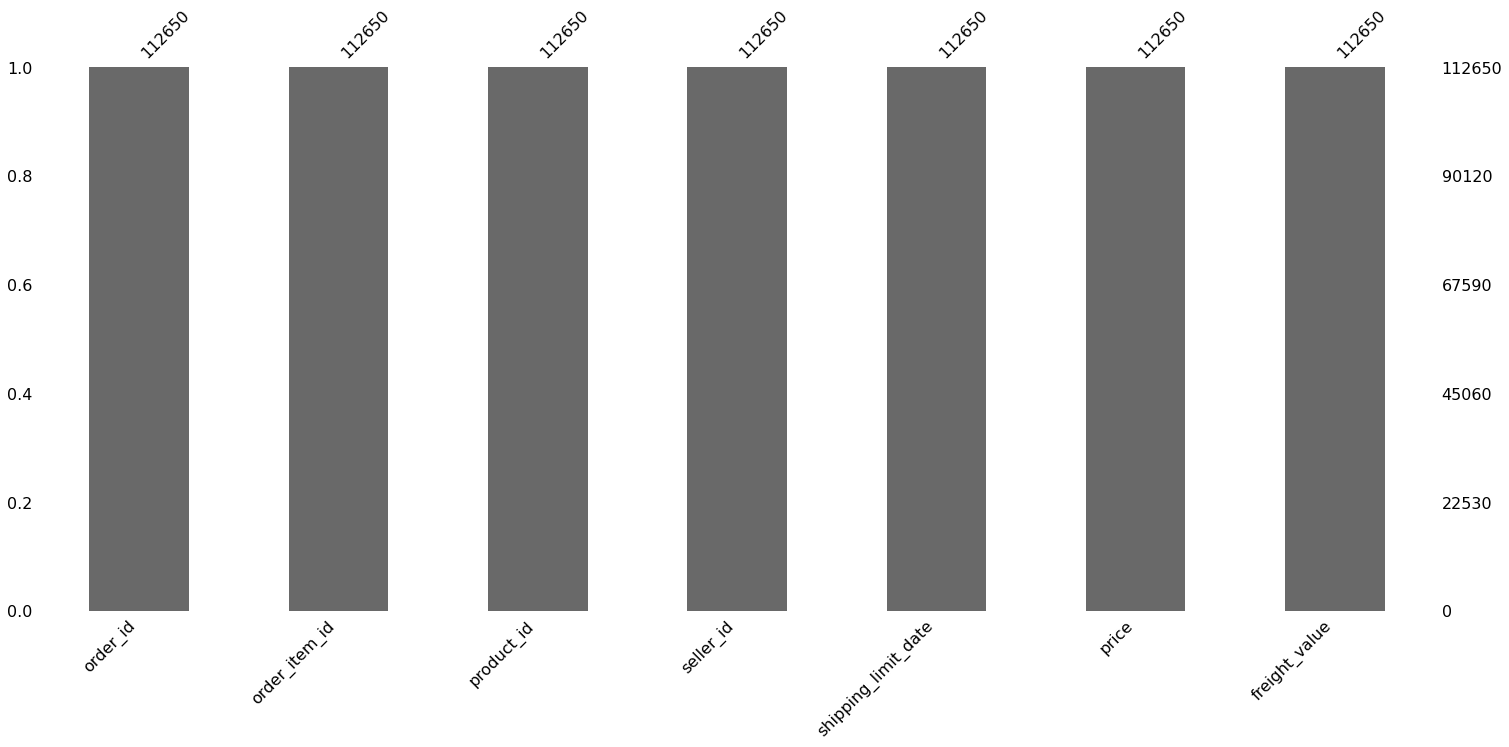

In [25]:
msn.bar(df_items)

### II.4.Paiements

In [26]:
df_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
df_payments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [29]:
df_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [30]:
df_payments.isna().mean()*100

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [31]:
df_payments.duplicated().sum()

0

In [32]:
df_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

<AxesSubplot:>

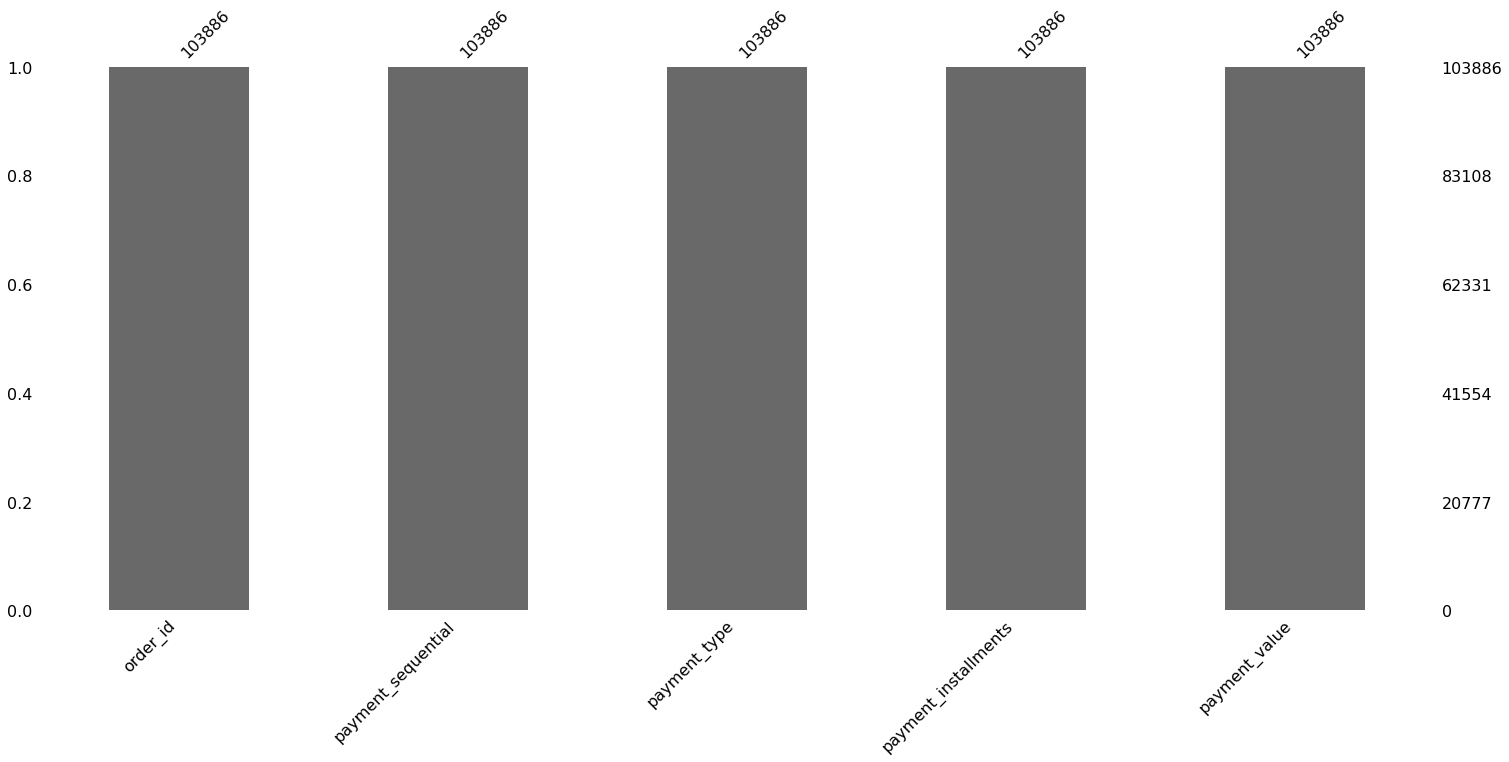

In [33]:
msn.bar(df_payments)

### II.5.Commentaires

In [34]:
df_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [35]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [36]:
df_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [37]:
df_reviews.isna().mean()*100

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [38]:
df_reviews.duplicated().sum()

0

In [39]:
df_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

<AxesSubplot:>

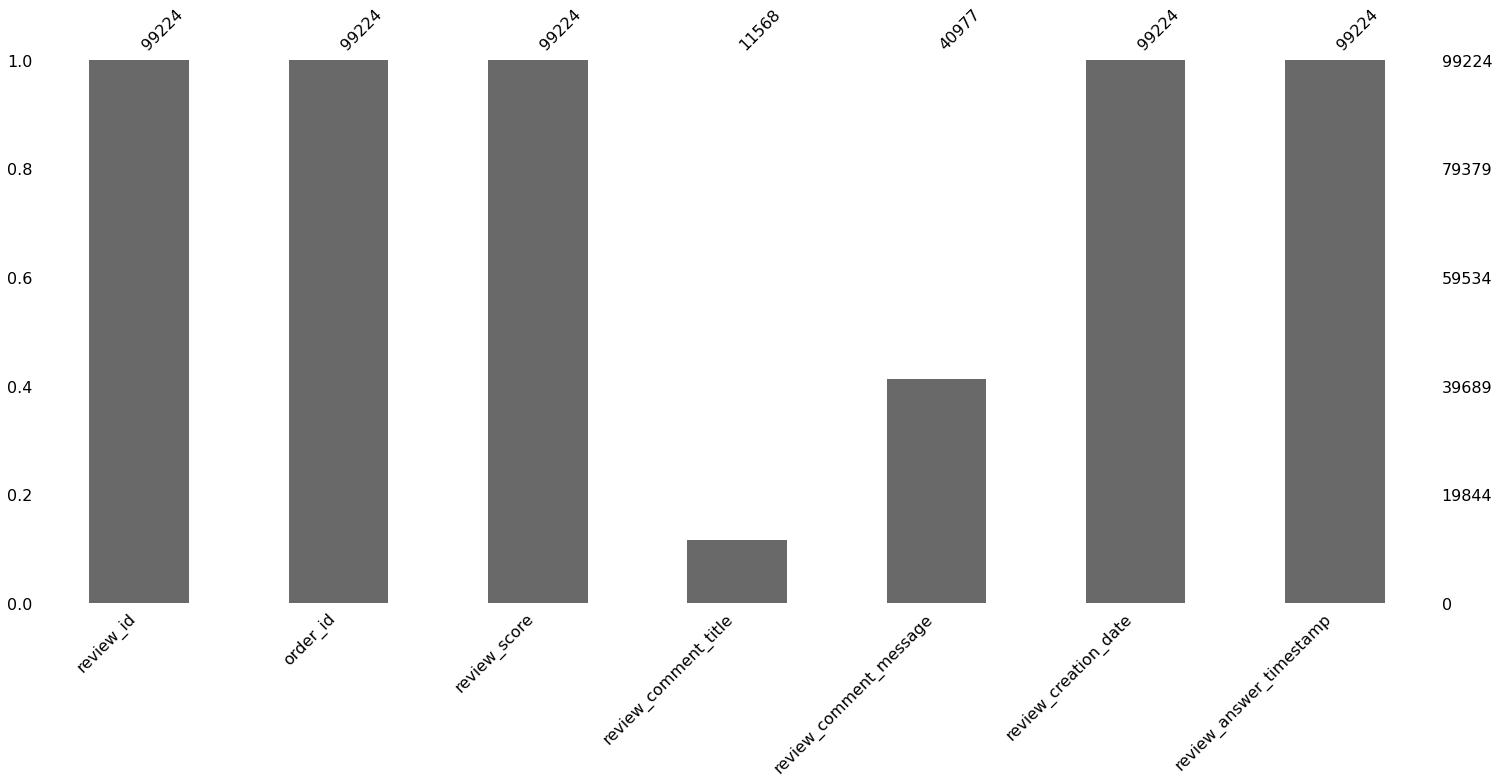

In [40]:
msn.bar(df_reviews)

### II.6.Commandes 

In [41]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [42]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [43]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [44]:
df_orders.isna().mean()*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [45]:
df_orders.duplicated().sum()

0

In [46]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

<AxesSubplot:>

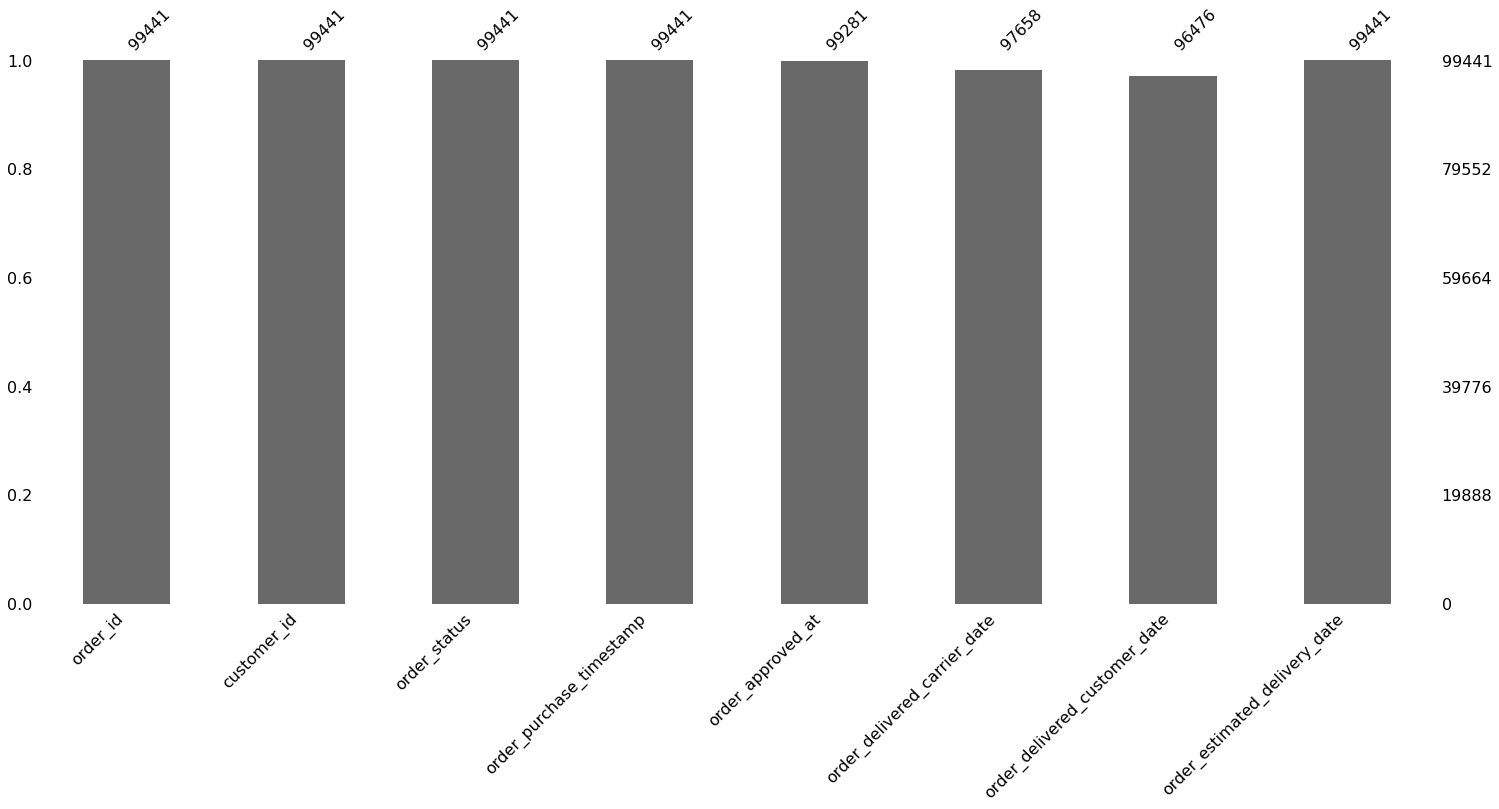

In [47]:
msn.bar(df_orders)

### II.7.Produits 

In [48]:
df_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [49]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [50]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [51]:
df_products.isna().mean()*100

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [52]:
df_products.duplicated().sum()

0

In [53]:
df_products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [54]:
df_products.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


<AxesSubplot:>

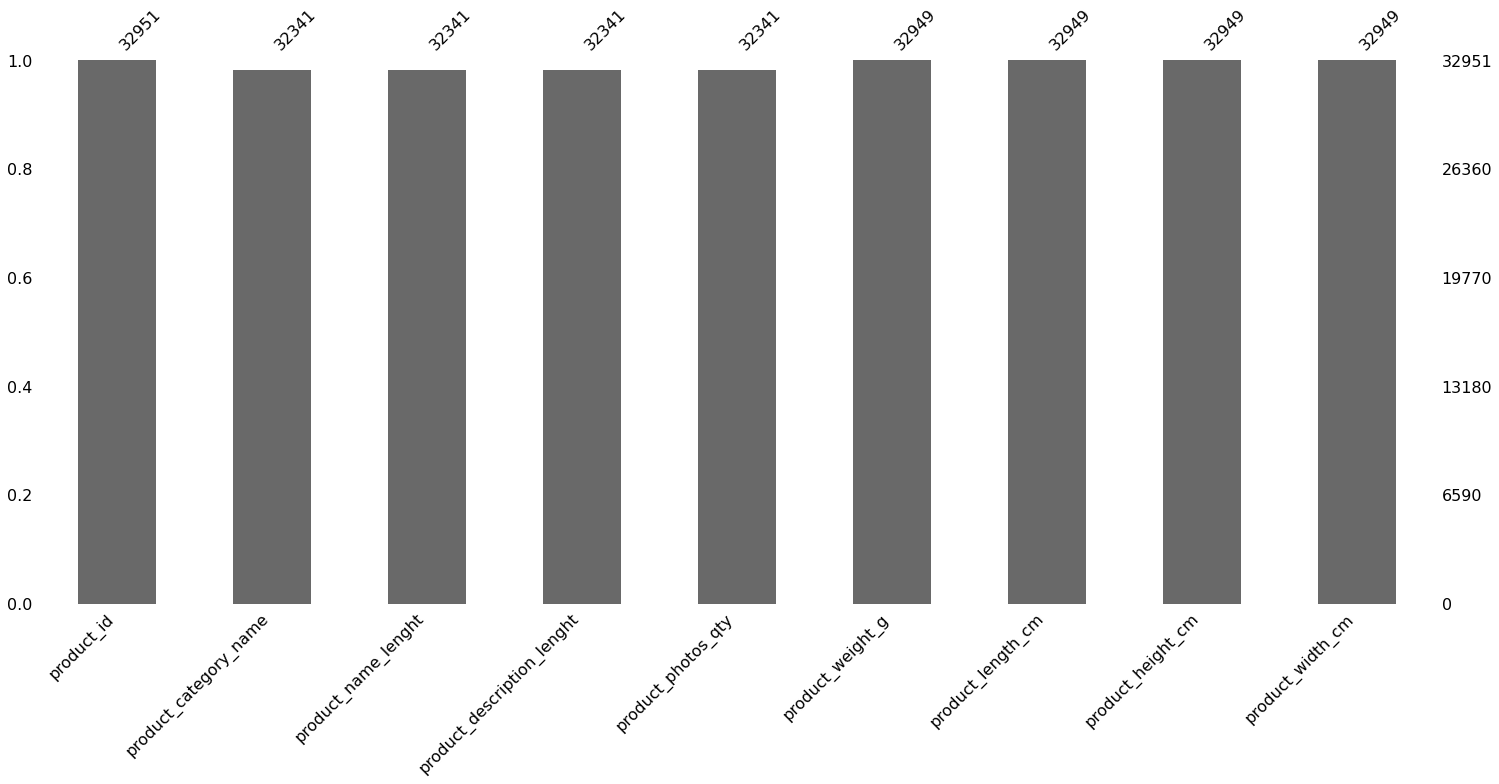

In [55]:
msn.bar(df_products)

### II.8.Vendeurs 

In [56]:
df_sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [57]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [58]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [59]:
df_sellers.isna().mean()*100

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

In [60]:
df_sellers.duplicated().sum()

0

In [61]:
df_sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

<AxesSubplot:>

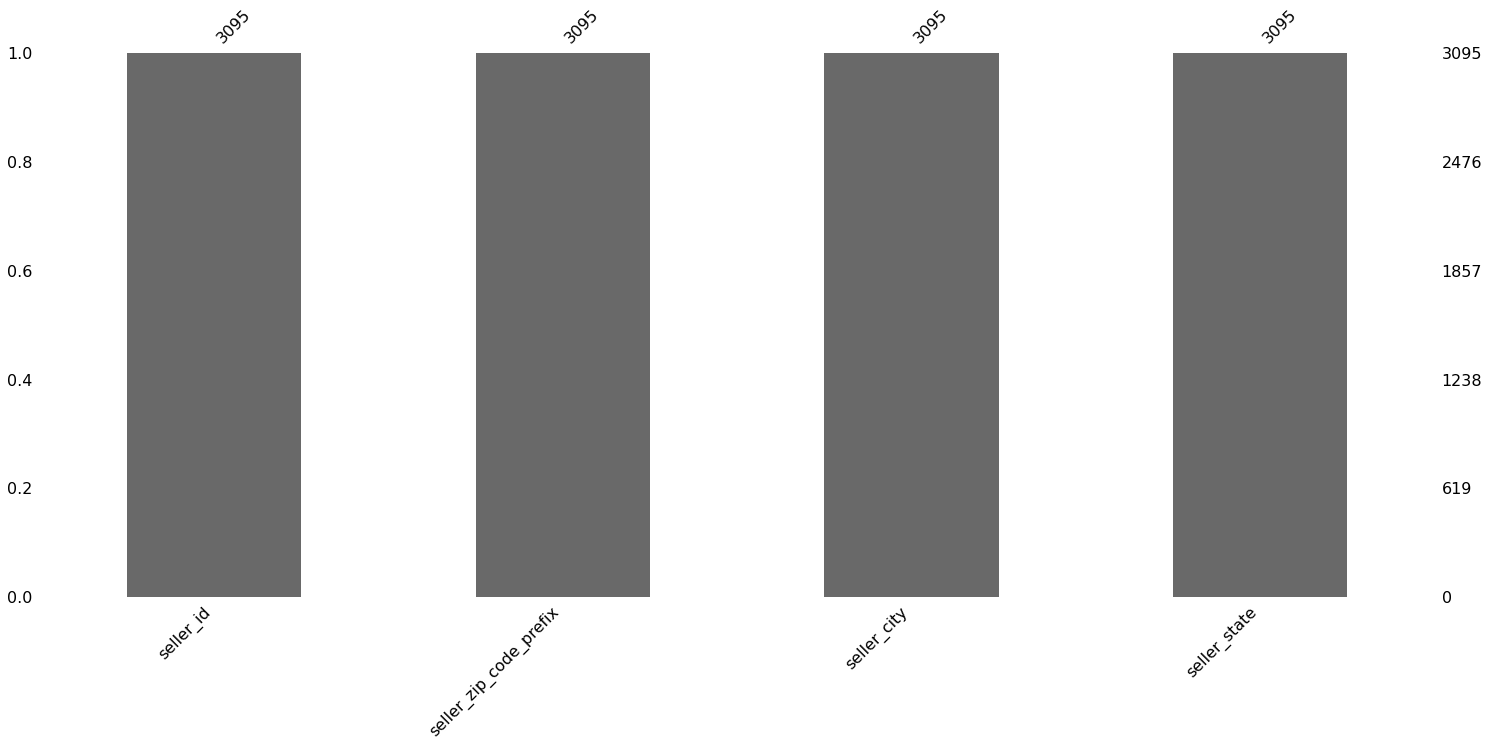

In [62]:
msn.bar(df_sellers)

### II.9.Catégorie de produits 

In [63]:
df_category.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [64]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [65]:
df_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [66]:
df_category.isna().mean()*100

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

In [67]:
df_category.duplicated().sum()

0

In [68]:
df_category.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

<AxesSubplot:>

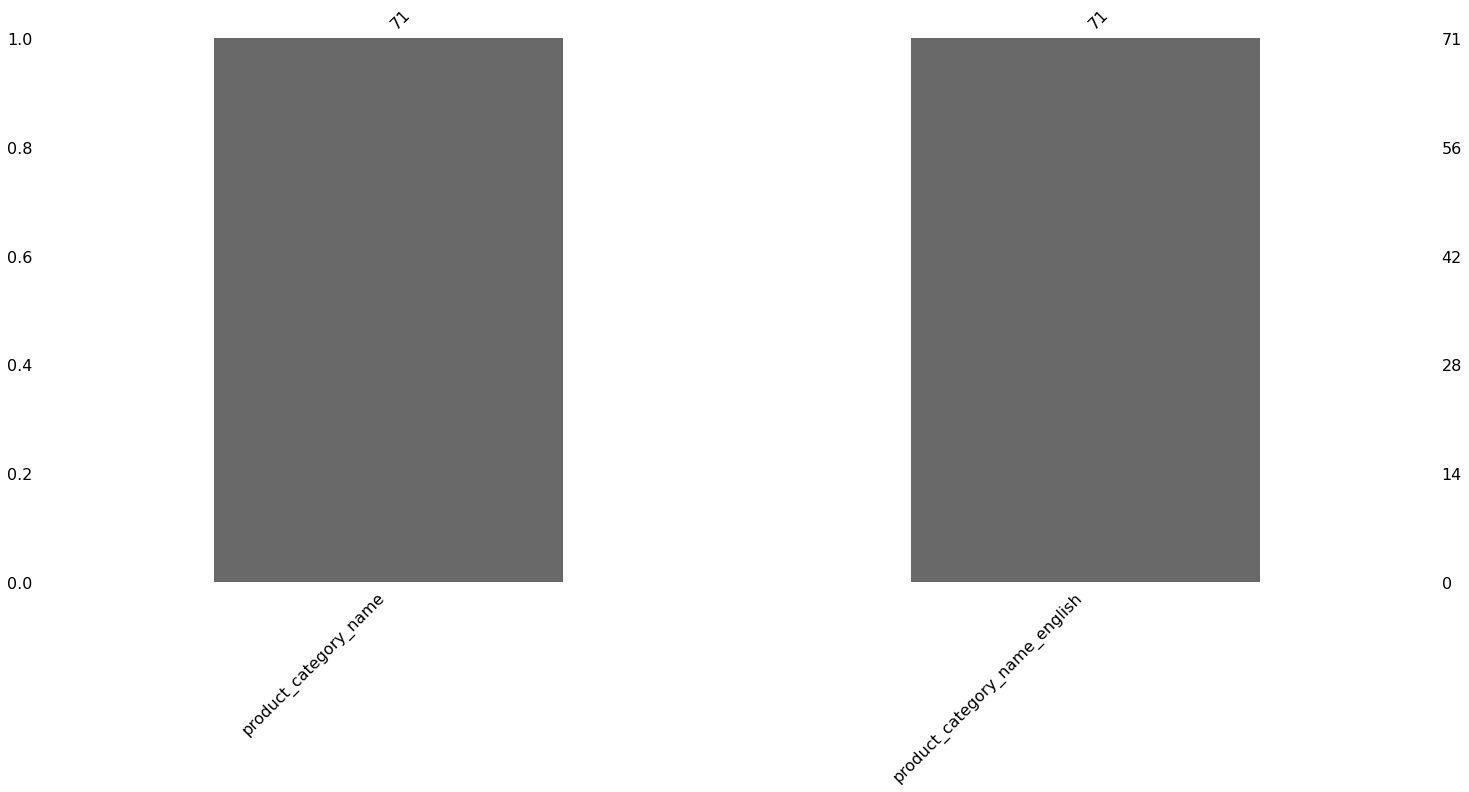

In [69]:
msn.bar(df_category)

### III.Concatenation des données 

### III.1.Produits et catégorie de produits 

In [70]:
products = pd.merge(df_products, df_category, how = "left", on = "product_category_name")

variables_inutiles = ["product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"] 
#doit supprimer ou pas, avoir...

products.drop(variables_inutiles, axis = 1, inplace = True)

products = products.rename(columns = {"product_category_name_english": "product_category_name"})

products.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


In [71]:
products.shape

(32951, 5)

In [72]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_category_name       32328 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [73]:
products.isna().mean()*100

product_id                    0.000000
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_category_name         1.890686
dtype: float64

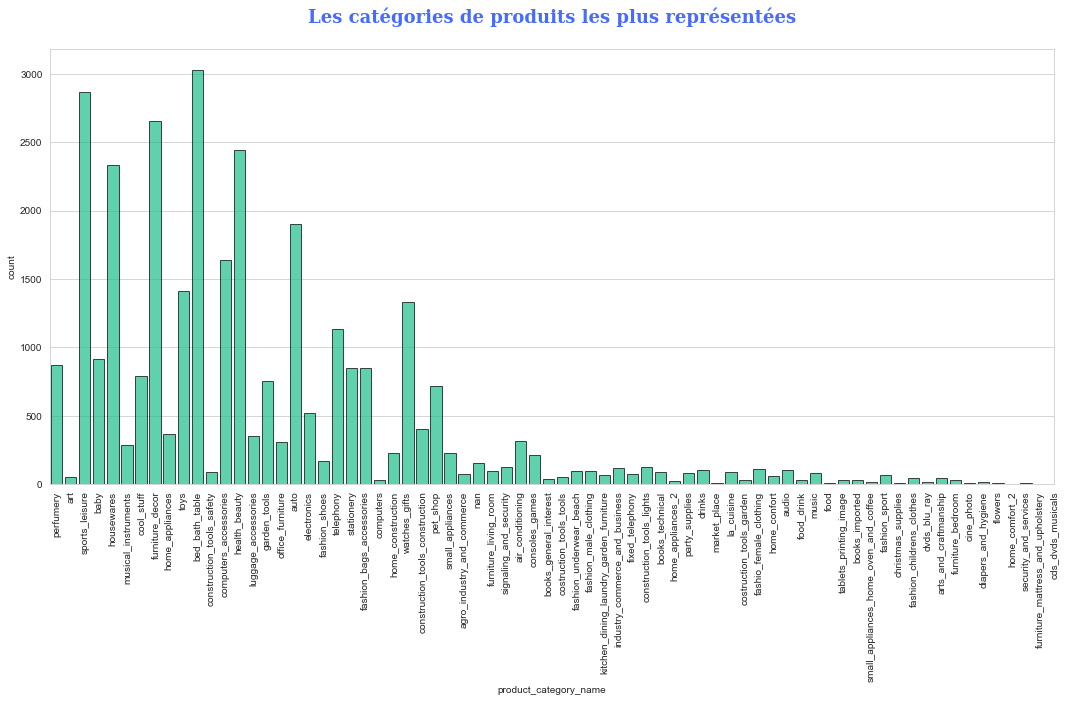

In [74]:
sns.set_style("whitegrid")
font_title = {"family": "serif", "color":  "#476bff", "weight": "bold", "size": 18}

fig = plt.figure(figsize = (18, 8))
sns.countplot(data = products, x = "product_category_name", edgecolor = "black", color = "#00d994", alpha = 0.7)
plt.xticks(range(0, products["product_category_name"].nunique()+1), products["product_category_name"].unique(), rotation = 90)
plt.title(f"Les catégories de produits les plus représentées\n", fontdict = font_title)

plt.show()

### III.2.Commandes

In [75]:
order_items = pd.merge(df_items, df_orders, how = "left", on = "order_id")

variables_inutiles_bis = ["seller_id", "shipping_limit_date", "order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date"]


order_items.drop(variables_inutiles_bis, axis = 1, inplace = True)

order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [76]:
order_items.shape

(112650, 9)

In [77]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   price                          112650 non-null  float64
 4   freight_value                  112650 non-null  float64
 5   customer_id                    112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_delivered_customer_date  110196 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 8.6+ MB


In [78]:
order_items.isna().mean()*100

order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    2.178429
dtype: float64

In [79]:
order_items.groupby(by = "order_status").sum()['order_item_id']

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

In [80]:
order_items = order_items[order_items["order_status"] == "delivered"]

In [81]:
order_items.shape

(110197, 9)

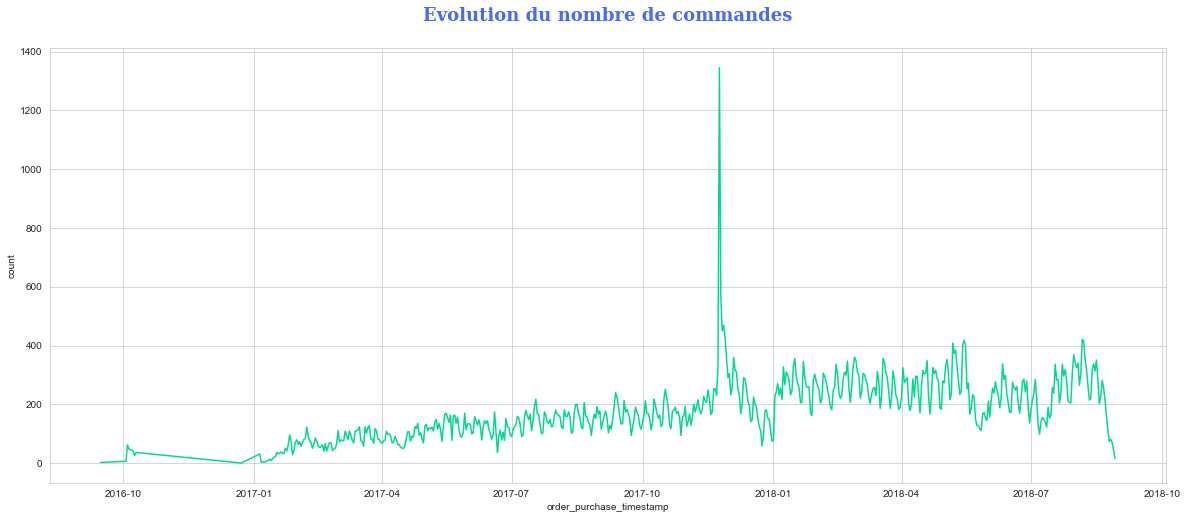

In [82]:
#Evolution des commandes en fonction du temps
orders_per_days = order_items.groupby(order_items["order_purchase_timestamp"].astype('datetime64[ns]').dt.date).count()["order_id"]

fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes\n", fontdict = font_title)

plt.show()

In [83]:
#Mise des variables liées au temps sous le bon foramt

datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    order_items[col] = order_items[col].astype('datetime64[ns]')

order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


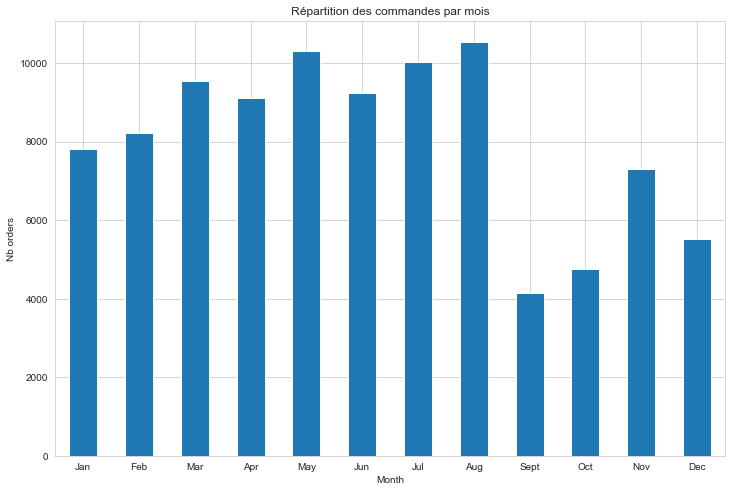

In [84]:
#Evolution des commandes par mois
order_items.groupby(order_items['order_purchase_timestamp'].dt.month).agg({"order_id": "nunique"}).plot(figsize = (12,8), kind = "bar", title = "Répartition des commandes par mois", ylabel = "Nb orders", xlabel = "Month", legend = False)

plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], rotation = 'horizontal')

plt.show()

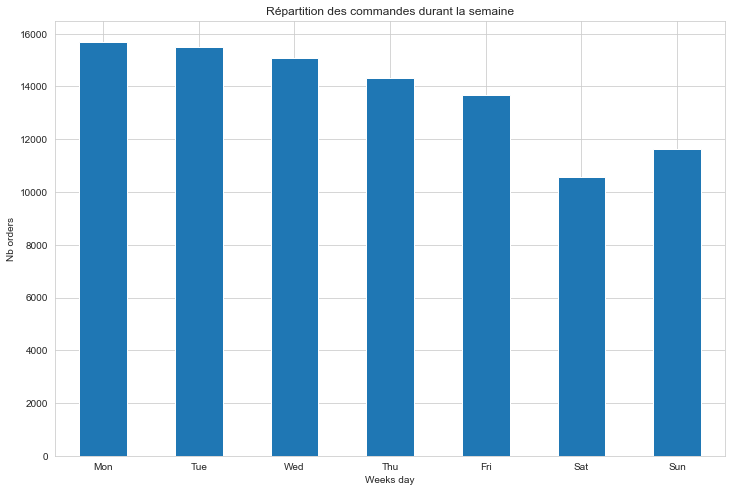

In [85]:
#Evolution des commandes durant la semaine
order_items.groupby(order_items['order_purchase_timestamp'].dt.dayofweek).agg({"order_id": "nunique"}).plot(figsize = (12,8), kind="bar", title = "Répartition des commandes durant la semaine", ylabel = "Nb orders", xlabel = "Weeks day", legend = False)

plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 'horizontal')

plt.show()

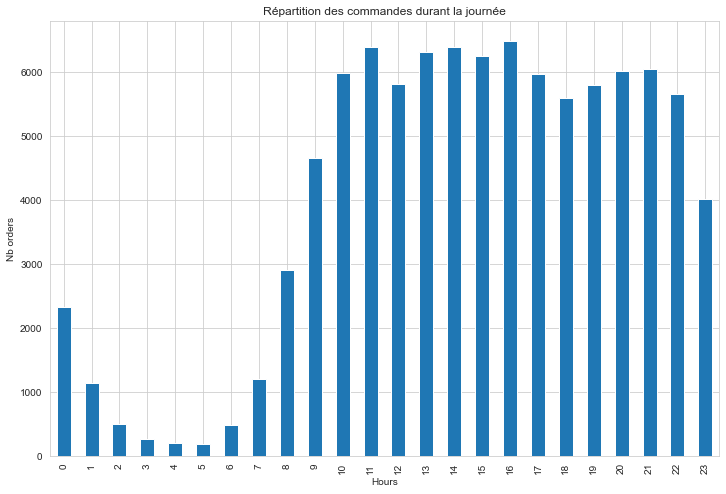

In [86]:
#Evolution des commandes durant la journée
order_items.groupby(order_items['order_purchase_timestamp'].dt.hour).agg({"order_id": "nunique"}).plot(figsize = (12,8), kind = "bar", title = "Répartition des commandes durant la journée", ylabel = "Nb orders", xlabel = "Hours", legend = False)

plt.show()

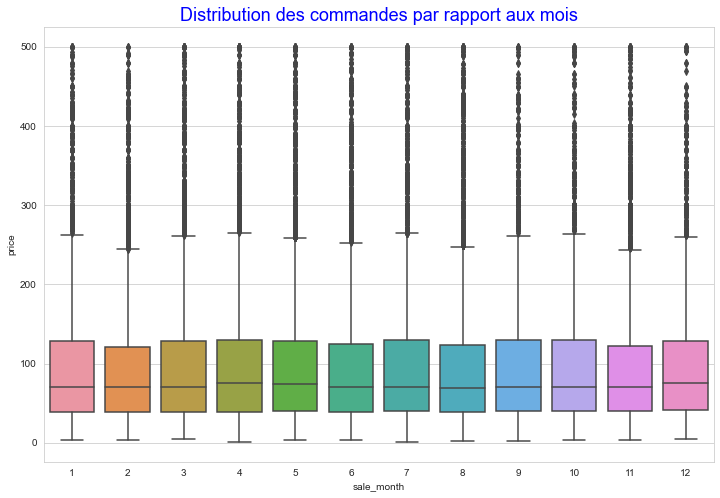

In [87]:
#Analyse de la distribution des commandes par rapport aux mois
order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month

fig = plt.figure(figsize = (12,8))

sns.boxplot(data = order_items[order_items.price < 500], x = "sale_month", y = "price")

plt.title("Distribution des commandes par rapport aux mois", fontsize = 18, color = "b")

plt.show()

### III.3.Commandes et paiements 

In [88]:
group_payments = df_payments.groupby(by="order_id").agg({"payment_sequential": 'count', "payment_installments": 'sum'})

In [89]:
order_items = pd.merge(order_items, group_payments, how = "left", on = "order_id")

order_items = order_items.rename(columns = {"payment_sequential": "nb_payment_sequential", "payment_installments": "sum_payment_installments"})

order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0


In [90]:
order_items.shape

(110197, 12)

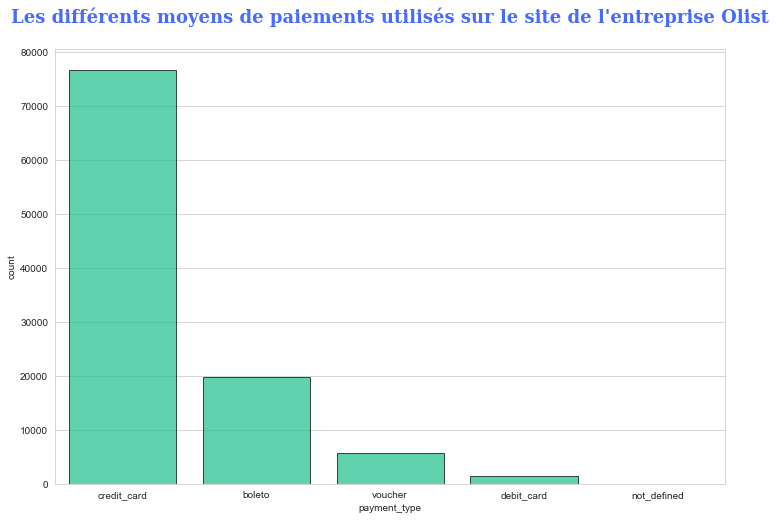

In [91]:
#Vérification de la répartition des moyens de paiement utilisés
fig = plt.figure(figsize = (12, 8))

sns.countplot(data = df_payments, x = "payment_type", edgecolor = "black", color = "#00d994", alpha = 0.7)

plt.title(f"Les différents moyens de paiements utilisés sur le site de l'entreprise Olist\n", fontdict = font_title)

plt.show()

### III.4.Commandes et commentaires

In [92]:
group_reviews = df_reviews.groupby("order_id").agg({"review_id": "count", "review_score": "mean"})

In [93]:
order_items = pd.merge(order_items, group_reviews, how = "left", on = "order_id")

order_items = order_items.rename(columns = {"review_id": "is_reviewed"})

order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,1.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,1.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,1.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,1.0,5.0


In [94]:
order_items.shape

(110197, 14)

In [95]:
order_items["is_reviewed"] = np.where(order_items["is_reviewed"] == 1, True, False)

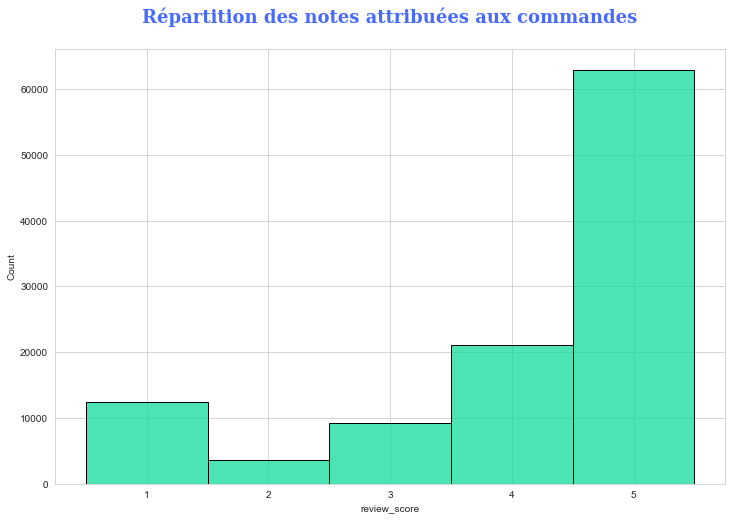

In [96]:
#projection de la répartion des notes attribuées aux commandes du site 
fig = plt.figure(figsize=(12, 8))

sns.histplot(data = order_items, x = "review_score", discrete = True, edgecolor = "black", color = "#00d994", alpha = 0.7)

plt.title(f"Répartition des notes attribuées aux commandes\n", fontdict = font_title)

plt.show()

### III.5.Commandes et clients

In [97]:
#Réalisation de la jointure sur le fichier clients
order_items = pd.merge(order_items, df_customers, how = "left", on = "customer_id")

order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [98]:
order_items.shape

(110197, 18)

### III.6.Jointure finale 

In [99]:
df_olist = pd.merge(order_items, products, how = "left", on = "product_id")

df_olist.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,...,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,...,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,...,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,...,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,...,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,...,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,garden_tools


In [100]:
print(f'df_olist contient {df_olist.shape[0]} lignes et {df_olist.shape[1]} colonnes')

df_olist contient 110197 lignes et 22 colonnes


In [101]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   sale_month                     110197 non-null  int64         
 10  nb_payment_sequential          110194 non-null  float64       
 11  

In [102]:
df_olist.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date       8
sale_month                          0
nb_payment_sequential               3
sum_payment_installments            3
is_reviewed                         0
review_score                      827
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_name_lenght              1537
product_description_lenght       1537
product_photos_qty               1537
product_category_name            1559
dtype: int64

In [103]:
df_olist.isna().mean()*100

order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    0.007260
sale_month                       0.000000
nb_payment_sequential            0.002722
sum_payment_installments         0.002722
is_reviewed                      0.000000
review_score                     0.750474
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
product_name_lenght              1.394775
product_description_lenght       1.394775
product_photos_qty               1.394775
product_category_name            1.414739
dtype: float64

In [104]:
df_olist.duplicated().sum()

0

In [105]:
df_olist.nunique()

order_id                         96478
order_item_id                       21
product_id                       32216
price                             5859
freight_value                     6924
customer_id                      96478
order_status                         1
order_purchase_timestamp         95956
order_delivered_customer_date    95658
sale_month                          12
nb_payment_sequential               19
sum_payment_installments            27
is_reviewed                          2
review_score                        11
customer_unique_id               93358
customer_zip_code_prefix         14889
customer_city                     4085
customer_state                      27
product_name_lenght                 65
product_description_lenght        2944
product_photos_qty                  19
product_category_name               71
dtype: int64

In [106]:
df_olist.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_item_id,110197.0,1.198181,0.706676,1.00,1.00,1.00,1.00,21.00
price,110197.0,119.980563,182.299446,0.85,39.90,74.90,134.17,6735.00
freight_value,110197.0,19.948598,15.698136,0.00,13.08,16.26,21.15,409.68
sale_month,110197.0,6.031634,3.230682,1.00,3.00,6.00,8.00,12.00
nb_payment_sequential,110194.0,1.043932,0.376623,1.00,1.00,1.00,1.00,26.00
sum_payment_installments,110194.0,3.065720,2.828219,0.00,1.00,2.00,4.00,26.00
review_score,109370.0,4.082044,1.345880,1.00,4.00,5.00,5.00,5.00
customer_zip_code_prefix,110197.0,35155.346888,29901.148745,1003.00,11310.00,24344.00,59066.00,99980.00
product_name_lenght,108660.0,48.808559,10.008243,5.00,42.00,52.00,57.00,76.00
product_description_lenght,108660.0,787.343788,651.321001,4.00,348.00,603.00,987.00,3992.00


<AxesSubplot:>

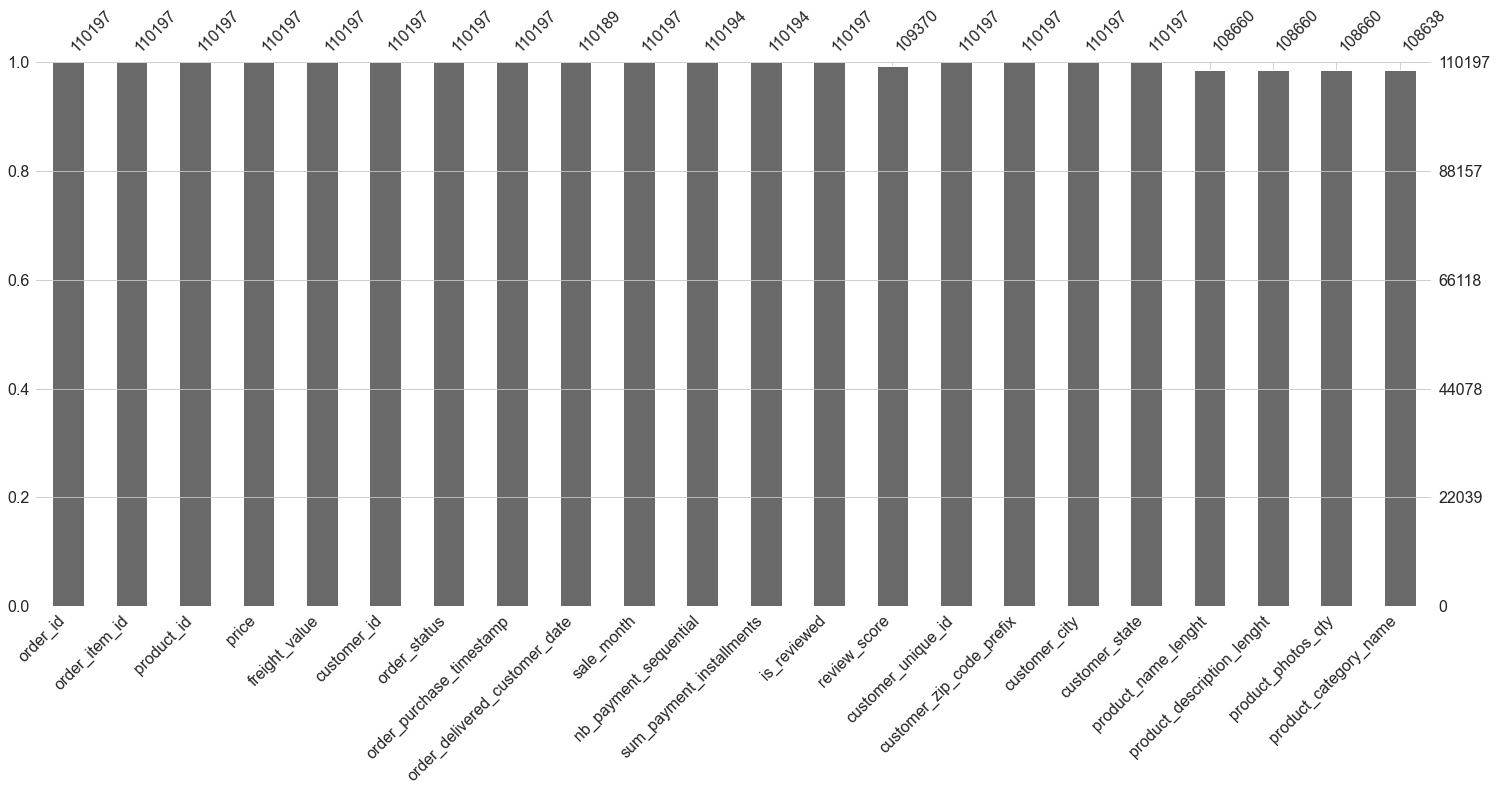

In [107]:
msn.bar(df_olist)

### IV.Feature engineering

In [108]:
df_olist["delivery_delta_days"] = (df_olist.order_delivered_customer_date - df_olist.order_purchase_timestamp).dt.round('1d').dt.days

df_olist.drop("order_delivered_customer_date", axis = 1, inplace = True)

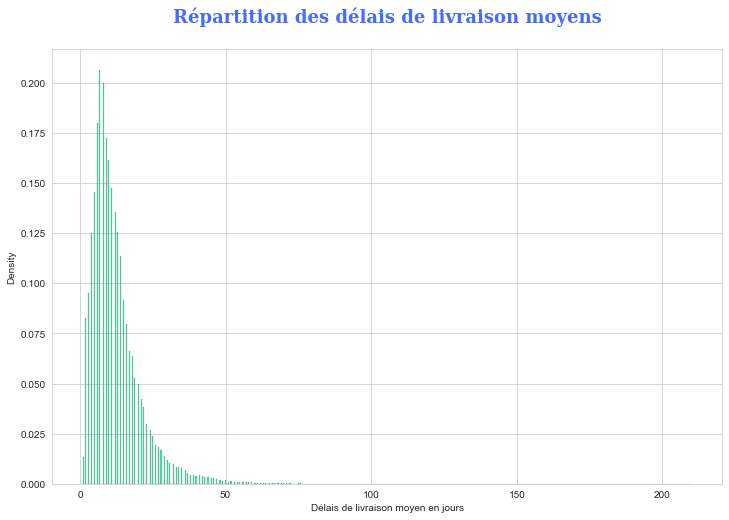

In [109]:
fig = plt.figure(figsize = (12, 8))

sns.histplot(data = df_olist, x = "delivery_delta_days", stat = "density", edgecolor = "black", color = "#00d994", alpha=0.7)

plt.xlabel("Délais de livraison moyen en jours")

plt.title(f"Répartition des délais de livraison moyens\n", fontdict = font_title)

plt.show()

In [110]:
df_olist['product_category'] = np.where((df_olist['product_category_name'].str.contains("fashio|luggage") == True),
                                    'fashion_clothing_accessories',
                           np.where((df_olist['product_category_name'].str.contains("health|beauty|perfum") == True),
                                    'health_beauty',
                           np.where((df_olist['product_category_name'].str.contains("toy|baby|diaper") == True),
                                     'toys_baby',
                           np.where((df_olist['product_category_name'].str.contains("book|cd|dvd|media") == True),
                                     'books_cds_media',
                           np.where((df_olist['product_category_name'].str.contains("grocer|food|drink") == True), 
                                     'groceries_food_drink',
                           np.where((df_olist['product_category_name'].str.contains("phon|compu|tablet|electro|consol") == True), 
                                     'technology',
                           np.where((df_olist['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc") == True), 
                                                                                          'home_furniture',
                           np.where((df_olist['product_category_name'].str.contains("flow|gift|stuff") == True),
                                     'flowers_gifts',
                           np.where((df_olist['product_category_name'].str.contains("sport") == True),
                                     'sport',
                                     'other')))))))))

In [111]:
#Suppression de la variable 'product_category_name'
df_olist.drop("product_category_name", axis = 1, inplace = True)

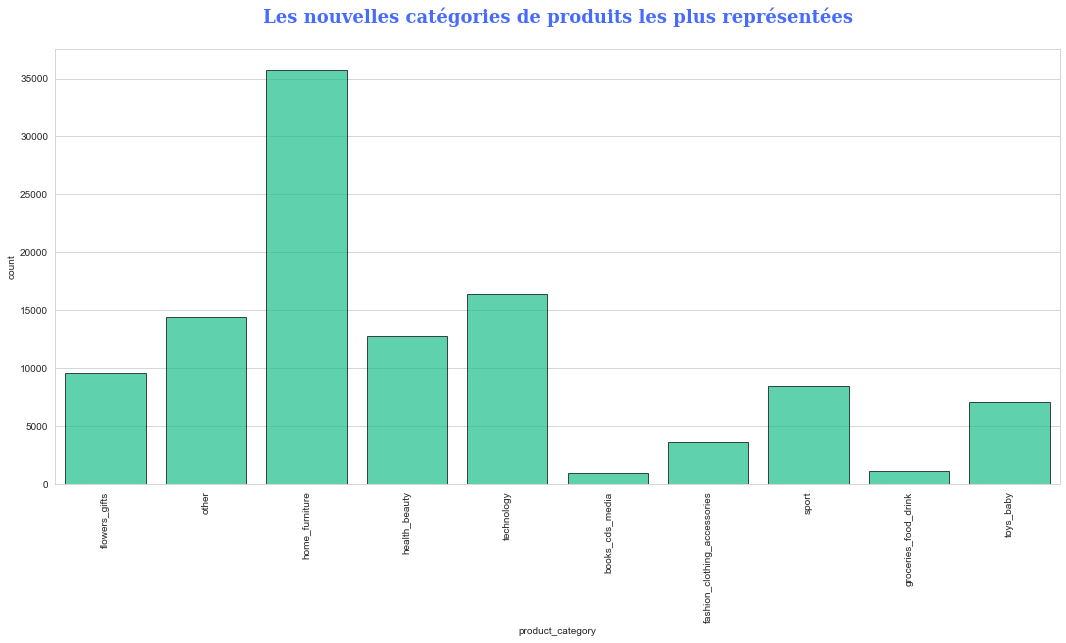

In [112]:
#Visualisation des catégories les plus représentées
fig = plt.figure(figsize = (18, 8))

sns.countplot(data = df_olist, x = "product_category", edgecolor = "black", color = "#00d994", alpha = 0.7)

plt.xticks(range(0, df_olist["product_category"].nunique()), df_olist["product_category"].unique(), rotation = 90)

plt.title(f"Les nouvelles catégories de produits les plus représentées\n", fontdict = font_title)

plt.show()

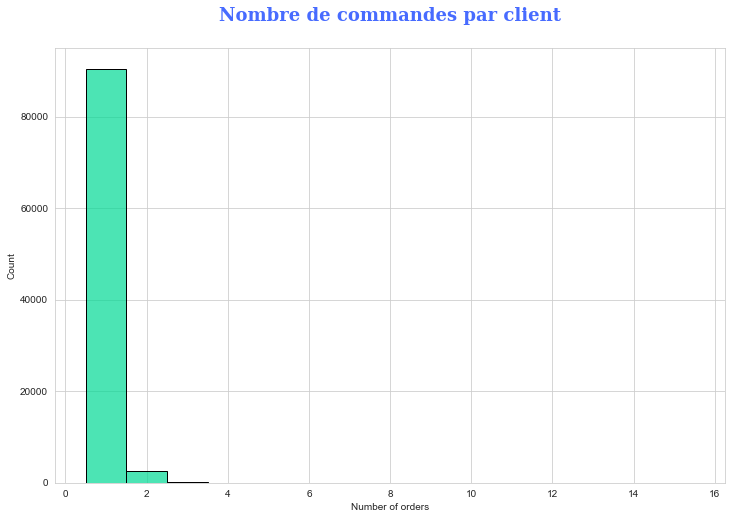

In [113]:
fig = plt.figure(figsize = (12, 8))

sns.histplot(df_olist.groupby("customer_unique_id").agg({"order_id": "nunique"}), x = "order_id", discrete = True, edgecolor = "black", color = "#00d994", alpha = 0.7)

plt.xlabel("Number of orders")

plt.title(f"Nombre de commandes par client\n", fontdict = font_title)

plt.show()

In [114]:
categories_customers = df_olist.groupby(["customer_unique_id", "product_category"]).agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace = True)
categories_customers["total_items"] = categories_customers.sum(axis = 1)

#Rapport du total d'objets
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace = True)

categories_customers.head(5)

product_category,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


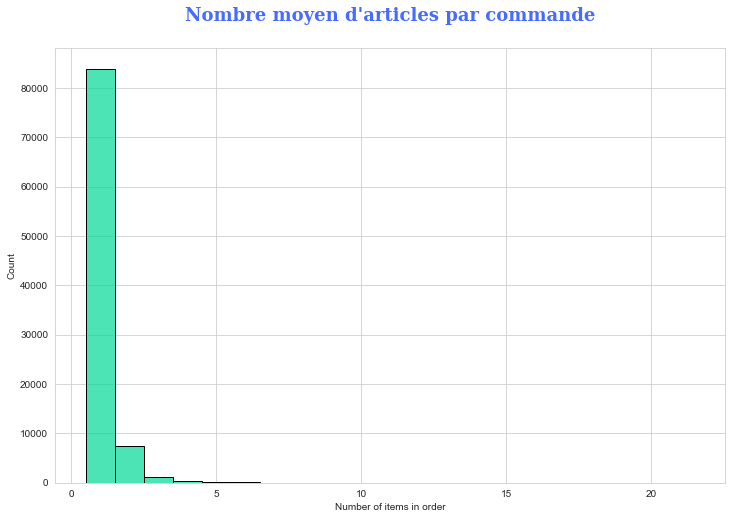

In [115]:
products_per_order = df_olist.groupby(["customer_unique_id", "order_id"]).agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id").agg({"order_item_id": "mean"})

#Visualisation de la densité du nombre d'articles
fig = plt.figure(figsize = (12, 8))
sns.histplot(data = products_per_order,
             x = "order_item_id",
             discrete = True,
             edgecolor = "black",
             color = "#00d994", alpha = 0.7)
plt.xlabel("Number of items in order")

plt.title(f"Nombre moyen d'articles par commande\n", fontdict = font_title)

plt.show()

In [116]:
recurencies = df_olist.groupby("customer_unique_id").agg({"order_purchase_timestamp": ["min","max"]})
recurencies.columns = recurencies.columns.droplevel(0)

#Date max dans le dataframe
max_date = df_olist["order_purchase_timestamp"].max()

#Temps écoulé à partir de la derniere commande
recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in recurencies.iterrows()]

recurencies.drop(["min", "max"], axis = 1, inplace = True)

recurencies.head(5)

,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288


### IV.1.Jeu de données clients

In [117]:
df_olist.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp', 'sale_month',
       'nb_payment_sequential', 'sum_payment_installments', 'is_reviewed',
       'review_score', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'delivery_delta_days', 'product_category'],
      dtype='object')

In [118]:
#Faire un 'group by' des acheteurs en fonction de la somme et de la moyenne
df_olist = df_olist.groupby("customer_unique_id").agg({"order_id": "nunique",
                  "price": "sum",
                  "freight_value": "sum",
                  "nb_payment_sequential": "mean", 
                  "sum_payment_installments": "mean", 
                  "review_score": "mean",
                  "delivery_delta_days": "mean",
                  "sale_month": lambda x: x.value_counts().index[0]})

#Renommer les colonnes
df_olist = df_olist.rename(columns = {"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "delivery_delta_days": "mean_delivery_days",
                            "sale_month": "favorite_sale_month"})

#Faire une jointure avec les autres indicateurs qui ont été crées
df_olist = pd.merge(df_olist, categories_customers, how = "left", on = "customer_unique_id")

df_olist = pd.merge(df_olist, products_per_order, how = "left", on = "customer_unique_id").rename(columns = {"order_item_id": "mean_nb_items"})

df_olist = pd.merge(df_olist, recurencies, how = "left", on = "customer_unique_id")

df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,11,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,288


In [119]:
df_olist["order_total_delay"] = df_olist["order_total_delay"] / df_olist["nb_orders"]
df_olist = df_olist.rename(columns = {"order_total_delay": "order_mean_delay"})

In [120]:
df_olist["freight_ratio"] = round(df_olist["total_freight"] / (df_olist["total_spend"] + df_olist["total_freight"]),2)

df_olist["mean_price_order"] = round(df_olist["total_spend"] / df_olist["nb_orders"],2)

df_olist["total_spend"] = (df_olist["total_spend"] + df_olist["total_freight"])

df_olist.drop("total_freight", axis = 1, inplace = True)

In [121]:
df_customers.drop("customer_id", axis = 1, inplace = True)

#Sélection de la valeur la plus fréquente pour chaque utilisateur
customers_info = df_customers.groupby("customer_unique_id").agg(lambda x: x.value_counts().index[0])

df_olist = pd.merge(df_olist, customers_info, how = "left", on = "customer_unique_id")

In [122]:
df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


### IV.2.Analyse du jeu de données clients 

In [123]:
print (f'Le jeu de données final df_olist contient {df_olist.shape[0]} lignes et {df_olist.shape[1]} colonnes')

Le jeu de données final df_olist contient 93358 lignes et 26 colonnes


In [124]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93357 non-null  float64
 4   mean_payment_installments     93357 non-null  float64
 5   mean_review_score             92755 non-null  float64
 6   mean_delivery_days            93350 non-null  float64
 7   favorite_sale_month           93358 non-null  int64  
 8   books_cds_media               93358 non-null  float64
 9   fashion_clothing_accessories  93358 non-null  float64
 10  flowers_gifts                 93358 non-null  float64
 11  groceries_food_drink          93358 non-null  float64
 12  health_beauty                 93358 non-null  float64
 13  h

In [125]:
df_olist.isna().sum()

customer_unique_id                0
nb_orders                         0
total_spend                       0
mean_payment_sequential           1
mean_payment_installments         1
mean_review_score               603
mean_delivery_days                8
favorite_sale_month               0
books_cds_media                   0
fashion_clothing_accessories      0
flowers_gifts                     0
groceries_food_drink              0
health_beauty                     0
home_furniture                    0
other                             0
sport                             0
technology                        0
toys_baby                         0
total_items                       0
mean_nb_items                     0
order_mean_delay                  0
freight_ratio                     0
mean_price_order                  0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [126]:
df_olist.isna().mean()*100

customer_unique_id              0.000000
nb_orders                       0.000000
total_spend                     0.000000
mean_payment_sequential         0.001071
mean_payment_installments       0.001071
mean_review_score               0.645901
mean_delivery_days              0.008569
favorite_sale_month             0.000000
books_cds_media                 0.000000
fashion_clothing_accessories    0.000000
flowers_gifts                   0.000000
groceries_food_drink            0.000000
health_beauty                   0.000000
home_furniture                  0.000000
other                           0.000000
sport                           0.000000
technology                      0.000000
toys_baby                       0.000000
total_items                     0.000000
mean_nb_items                   0.000000
order_mean_delay                0.000000
freight_ratio                   0.000000
mean_price_order                0.000000
customer_zip_code_prefix        0.000000
customer_city   

In [127]:
#Trouvez des fonctionnalités à remplir avec le mode
features_to_fill = df_olist.isnull().sum()
features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)

for f in features_to_fill:
    df_olist[f] = df_olist[f].fillna(df_olist[f].mode()[0])
    print(f, df_olist[f].mode()[0])

mean_payment_sequential 1.0
mean_payment_installments 1.0
mean_review_score 5.0
mean_delivery_days 7.0


In [128]:
df_olist.isna().mean()*100

customer_unique_id              0.0
nb_orders                       0.0
total_spend                     0.0
mean_payment_sequential         0.0
mean_payment_installments       0.0
mean_review_score               0.0
mean_delivery_days              0.0
favorite_sale_month             0.0
books_cds_media                 0.0
fashion_clothing_accessories    0.0
flowers_gifts                   0.0
groceries_food_drink            0.0
health_beauty                   0.0
home_furniture                  0.0
other                           0.0
sport                           0.0
technology                      0.0
toys_baby                       0.0
total_items                     0.0
mean_nb_items                   0.0
order_mean_delay                0.0
freight_ratio                   0.0
mean_price_order                0.0
customer_zip_code_prefix        0.0
customer_city                   0.0
customer_state                  0.0
dtype: float64

In [129]:
df_olist.nunique()

customer_unique_id              93358
nb_orders                           9
total_spend                     31224
mean_payment_sequential            36
mean_payment_installments         114
mean_review_score                  63
mean_delivery_days                353
favorite_sale_month                12
books_cds_media                     7
fashion_clothing_accessories       16
flowers_gifts                      15
groceries_food_drink               12
health_beauty                      14
home_furniture                     25
other                              22
sport                              12
technology                         17
toys_baby                          11
total_items                        19
mean_nb_items                      39
order_mean_delay                  932
freight_ratio                      87
mean_price_order                 8199
customer_zip_code_prefix        14878
customer_city                    4085
customer_state                     27
dtype: int64

In [130]:
df_olist.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nb_orders,93358.0,1.033420,0.209097,1.00,1.00,1.00,1.00,15.00
total_spend,93358.0,165.168210,226.292101,9.59,63.01,107.78,182.51,13664.08
mean_payment_sequential,93358.0,1.043872,0.364435,1.00,1.00,1.00,1.00,26.00
mean_payment_installments,93358.0,2.965951,2.717719,0.00,1.00,2.00,4.00,26.00
mean_review_score,93358.0,4.158806,1.278290,1.00,4.00,5.00,5.00,5.00
mean_delivery_days,93358.0,12.524327,9.550578,1.00,7.00,10.00,16.00,210.00
favorite_sale_month,93358.0,6.034759,3.226430,1.00,3.00,6.00,8.00,12.00
books_cds_media,93358.0,0.009085,0.094527,0.00,0.00,0.00,0.00,1.00
fashion_clothing_accessories,93358.0,0.034082,0.180035,0.00,0.00,0.00,0.00,1.00
flowers_gifts,93358.0,0.094412,0.290952,0.00,0.00,0.00,0.00,1.00


In [131]:
df_olist[df_olist["mean_price_order"] == df_olist["mean_price_order"].max()]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
3724,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,1.0,1.0,1.0,18.0,9,0.0,0.0,...,1.0,0.0,8.0,8.0,334.0,0.02,13440.0,20080,rio de janeiro,RJ


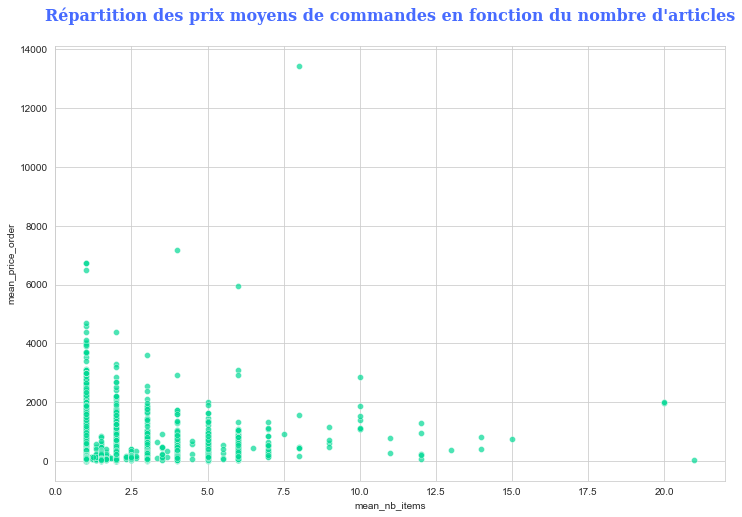

In [132]:
fig = plt.figure(figsize = (12, 8))

sns.scatterplot(data = df_olist, y = "mean_price_order", x = "mean_nb_items", color = "#00d994", alpha = 0.7)

plt.title(f"Répartition des prix moyens de commandes en fonction du nombre d'articles\n", fontdict = font_title, fontsize = 16)

plt.show()

In [133]:
df_olist[df_olist["mean_nb_items"] > 20]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
25309,4546caea018ad8c692964e3382debd19,1,196.17,1.0,2.0,1.0,15.0,7,0.0,0.0,...,0.0,0.0,21.0,21.0,409.0,0.84,31.8,5882,sao paulo,SP


### IV.3.Localisation des clients 

In [134]:
df_customers['customer_state'].nunique()

27

In [135]:
df_customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [136]:
states_table = pd.read_csv('./datasets/flag_name_test.csv', sep = ';')

In [137]:
states_table.head(5)

,Flag and name,Code,Capital,Largest city,Area,Population,Density,GDP,HDI
0,Acre,AC,Rio Branco,NaN,164123,880000,6.34,15,0.719
1,Alagoas,AL,Maceió,NaN,27779,3334000,125.52,50,0.683
2,Amapá,AP,Macapá,NaN,142829,838000,2.63,12,0.740
3,Amazonas,AM,Manaus,NaN,1559159,4147000,2.58,94,0.733
4,Bahia,BA,Salvador,NaN,564733,14897000,30.52,262,0.714


In [138]:
states_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Flag and name  27 non-null     object 
 1   Code           27 non-null     object 
 2   Capital        27 non-null     object 
 3   Largest city   2 non-null      object 
 4   Area           27 non-null     int64  
 5   Population     27 non-null     int64  
 6   Density        27 non-null     float64
 7   GDP            27 non-null     int64  
 8   HDI            27 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 2.0+ KB


In [139]:
states_table['HDI']

0     0.719
1     0.683
2     0.740
3     0.733
4     0.714
5     0.735
6     0.850
7     0.772
8     0.769
9     0.687
10    0.774
11    0.766
12    0.787
13    0.698
14    0.722
15    0.792
16    0.727
17    0.697
18    0.796
19    0.731
20    0.787
21    0.725
22    0.752
23    0.808
24    0.826
25    0.702
26    0.743
Name: HDI, dtype: float64

In [140]:
states_table = states_table.set_index('Code')

states_table.head(5)

,Flag and name,Capital,Largest city,Area,Population,Density,GDP,HDI
Code,,,,,,,,
AC,Acre,Rio Branco,NaN,164123,880000,6.34,15,0.719
AL,Alagoas,Maceió,NaN,27779,3334000,125.52,50,0.683
AP,Amapá,Macapá,NaN,142829,838000,2.63,12,0.740
AM,Amazonas,Manaus,NaN,1559159,4147000,2.58,94,0.733
BA,Bahia,Salvador,NaN,564733,14897000,30.52,262,0.714


In [141]:
#states_table['Flag and name'].head(5)

In [143]:
print(states_table.iloc[:5,0])

Code
AC         Acre
AL      Alagoas
AP        Amapá
AM     Amazonas
BA        Bahia
Name: Flag and name, dtype: object


In [ ]:
#df_olist = pd.merge(df_olist.reset_index(), states_table[["Flag and name"]],
               #how = "left",
               #left_on = "customer_state",
               #right_on = "Code")
#df_olist.drop("customer_state", axis = 1, inplace = True)
#df_olist = df_olist.rename(columns = {"Flag and name": "customer_state"})

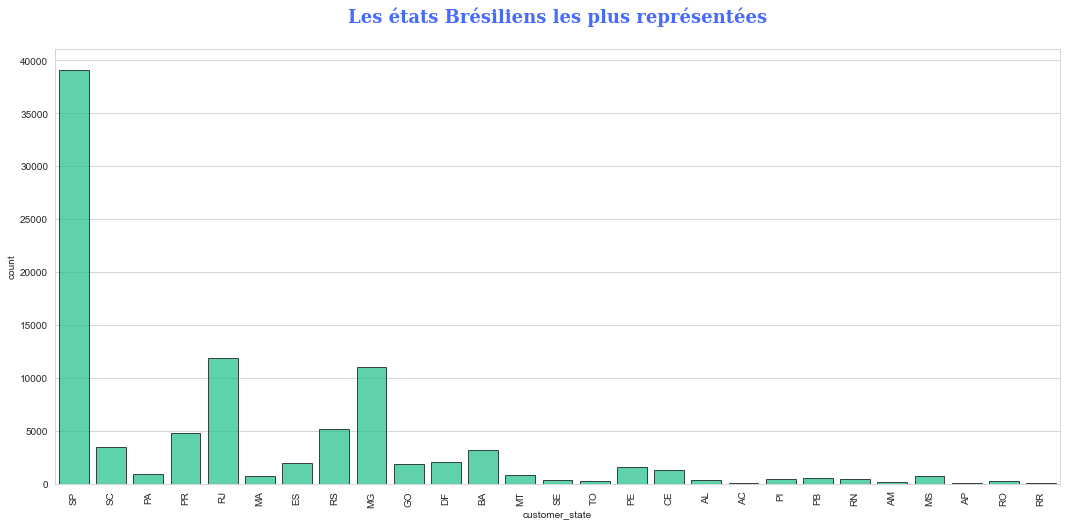

In [144]:
#Répartition des états
fig = plt.figure(figsize = (18, 8))

sns.countplot(data = df_olist, x = "customer_state",
              edgecolor = "black",
              color = "#00d994", alpha = 0.7)

plt.xticks(range(0, df_olist["customer_state"].nunique()),
           df_olist["customer_state"].unique(), rotation = 90)

plt.title(f"Les états Brésiliens les plus représentées\n", fontdict = font_title)

plt.show()

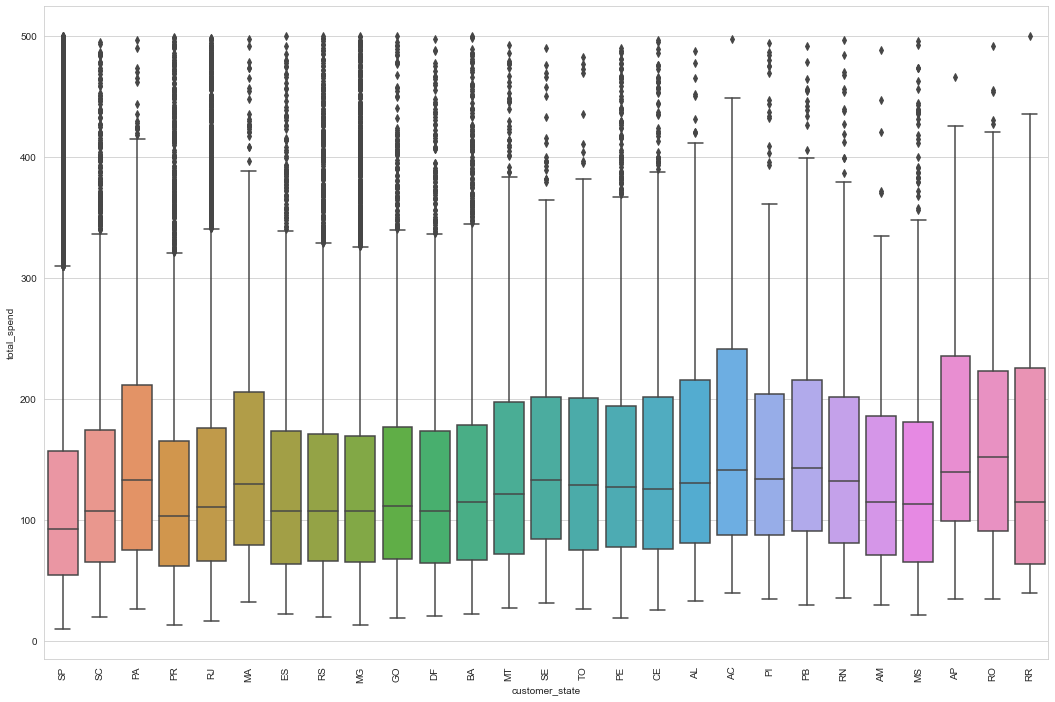

In [145]:
#Visualisation des montants dépensés par chaque état 
fig = plt.figure(figsize = (18,12))

sns.boxplot(x = "customer_state", y = "total_spend", data = df_olist[df_olist["total_spend"] < 500])

plt.xticks(rotation = 90)

plt.show()

In [ ]:
#state_location = df_geolocation.groupby("geolocation_state").mean()

#state_location = pd.merge(states_table[["Flag and name"]].reset_index(), 
                          #state_location, 
                          #right_on = "geolocation_state", 
                          #left_on = "Code", 
                          #how = "left")
#state_location = state_location[["Flag and name", "geolocation_lat", "geolocation_lng"]]

# Olist location
#olist_lat = -25.43045
#olist_lon = -49.29207

In [146]:
state_location = df_geolocation.groupby("geolocation_state").mean()

In [147]:
state_location.head(20)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
geolocation_state,,,
AC,69798.877786,-9.702555,-68.451852
AL,57234.456371,-9.599729,-36.052017
AM,69142.245888,-3.349336,-60.537430
AP,68911.880422,0.086025,-51.234304
BA,44289.646858,-13.049361,-39.560649
CE,61662.827908,-4.363151,-39.004140
DF,71592.770137,-15.810885,-47.969630
ES,29327.859864,-20.105145,-40.503183
GO,75028.224440,-16.577645,-49.334195


In [148]:
state_location = pd.merge(df_customers["customer_state"].reset_index(), 
                          state_location, 
                          right_on = "geolocation_state", 
                          left_on = "customer_state", 
                          how = "left")

state_location = state_location[["customer_state", "geolocation_lat", "geolocation_lng"]]

# Olist location
olist_lat = -25.43045
olist_lon = -49.29207

In [149]:
state_location.head(5)

,customer_state,geolocation_lat,geolocation_lng
0,SP,-23.155308,-47.084074
1,SP,-23.155308,-47.084074
2,SP,-23.155308,-47.084074
3,SP,-23.155308,-47.084074
4,SP,-23.155308,-47.084074


In [150]:
state_location.shape

(99441, 3)

In [151]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees = True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [152]:
#Distance Haversine entre le centre géographique de l'état et le siège de Olist
state_location['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(state_location.geolocation_lat, 
                                              state_location.geolocation_lng)]

In [154]:
state_location.head(5)

,customer_state,geolocation_lat,geolocation_lng,harvesine_distance
0,SP,-23.155308,-47.084074,209.713834
1,SP,-23.155308,-47.084074,209.713834
2,SP,-23.155308,-47.084074,209.713834
3,SP,-23.155308,-47.084074,209.713834
4,SP,-23.155308,-47.084074,209.713834


In [155]:
state_location.shape

(99441, 4)

In [156]:
state_location = state_location.drop(columns = ['geolocation_lat','geolocation_lng'])

In [157]:
state_location.head(20)

,customer_state,harvesine_distance
0,SP,209.713834
1,SP,209.713834
2,SP,209.713834
3,SP,209.713834
4,SP,209.713834
5,SC,125.363853
6,SP,209.713834
7,MG,493.836401
8,PR,108.557249
9,MG,493.836401


In [158]:
#df_olist = pd.merge(df_olist, state_location[["Flag and name", "harvesine_distance"]], how = "left", left_on = "customer_state", right_on = "Flag and name")

#df_olist = pd.merge(df_olist, state_location, how = "left", on = "customer_state")

#df_olist.drop("index", axis = 1, inplace = True)

#df_olist.set_index("customer_unique_id", inplace = True)

#df_olist.head(5)

In [159]:
df_olist.shape

(93358, 26)

In [160]:
df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


In [161]:
df_geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [162]:
df_geolocation_c = df_geolocation.copy()

In [163]:
df_geolocation_c.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [164]:
df_geolocation_c = df_geolocation_c.rename(columns = {"geolocation_zip_code_prefix": "customer_zip_code_prefix"})

In [165]:
df_geolocation_c.head(5)

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [166]:
df_olist.columns

Index(['customer_unique_id', 'nb_orders', 'total_spend',
       'mean_payment_sequential', 'mean_payment_installments',
       'mean_review_score', 'mean_delivery_days', 'favorite_sale_month',
       'books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts',
       'groceries_food_drink', 'health_beauty', 'home_furniture', 'other',
       'sport', 'technology', 'toys_baby', 'total_items', 'mean_nb_items',
       'order_mean_delay', 'freight_ratio', 'mean_price_order',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [167]:
df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


In [168]:
#Nous allons rajouter les variables de localisation (contenues dans df_geolocation) à notre jeu de données df_olist
df_olist = pd.merge(df_olist, df_geolocation_c, how = "left", on = "customer_zip_code_prefix")

In [169]:
df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,111.0,0.08,129.9,7787,cajamar,SP,-23.335331,-46.828647,cajamar,SP
1,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,111.0,0.08,129.9,7787,cajamar,SP,-23.337801,-46.919983,cajamar,SP
2,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,111.0,0.08,129.9,7787,cajamar,SP,-23.343670,-46.824528,cajamar,SP
3,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,111.0,0.08,129.9,7787,cajamar,SP,-23.336104,-46.829195,cajamar,SP
4,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,111.0,0.08,129.9,7787,cajamar,SP,-23.338572,-46.826739,cajamar,SP


In [170]:
#Eliminer les variables inutiles introduites lors de la jointure
df_olist = df_olist.drop(columns = ['geolocation_city','geolocation_state'])

In [171]:
df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.335331,-46.828647
1,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.337801,-46.919983
2,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.343670,-46.824528
3,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.336104,-46.829195
4,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.338572,-46.826739


In [172]:
df_olist['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(df_olist.geolocation_lat, 
                                              df_olist.geolocation_lng)]

In [173]:
df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,harvesine_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.335331,-46.828647,211.943928
1,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.337801,-46.919983,207.663834
2,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.343670,-46.824528,211.737450
3,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.336104,-46.829195,211.882046
4,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,1.0,111.0,0.08,129.9,7787,cajamar,SP,-23.338572,-46.826739,211.877601


In [174]:
df_olist = df_olist.drop(columns = ['geolocation_lat','geolocation_lng'])

In [175]:
df_olist.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,harvesine_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,211.943928
1,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,207.663834
2,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,211.737450
3,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,211.882046
4,0000366f3b9a7992bf8c76cfdf3221e2,1,141.9,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,1.0,1.0,111.0,0.08,129.9,7787,cajamar,SP,211.877601


In [176]:
df_olist_test = df_olist.groupby("customer_unique_id").mean()

In [177]:
df_olist_test.head(5)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,sport,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,harvesine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,1.0,8.0,5.0,6.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787.0,211.643700
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,1.0,1.0,4.0,3.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053.0,203.596133
0000f46a3911fa3c0805444483337064,1.0,86.22,1.0,8.0,3.0,26.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115.0,151.425763
0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,1.0,4.0,4.0,20.0,10.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812.0,1666.119961
0004aac84e0df4da2b147fca70cf8255,1.0,196.89,1.0,6.0,5.0,13.0,11.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040.0,175.436120


In [178]:
df_olist_test.shape

(93358, 24)

In [179]:
df_olist_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nb_orders                     93358 non-null  float64
 1   total_spend                   93358 non-null  float64
 2   mean_payment_sequential       93358 non-null  float64
 3   mean_payment_installments     93358 non-null  float64
 4   mean_review_score             93358 non-null  float64
 5   mean_delivery_days            93358 non-null  float64
 6   favorite_sale_month           93358 non-null  float64
 7   books_cds_media               93358 non-null  float64
 8   fashion_clothing_accessories  93358 non-null  float64
 9   flowers_gifts                 93358 non-null  float64
 10  groceries_food_drink          93358 non-null  float64
 11  health_beauty                 93358 non-null  float64
 12  home_fu

### IV.4.Corrélation 

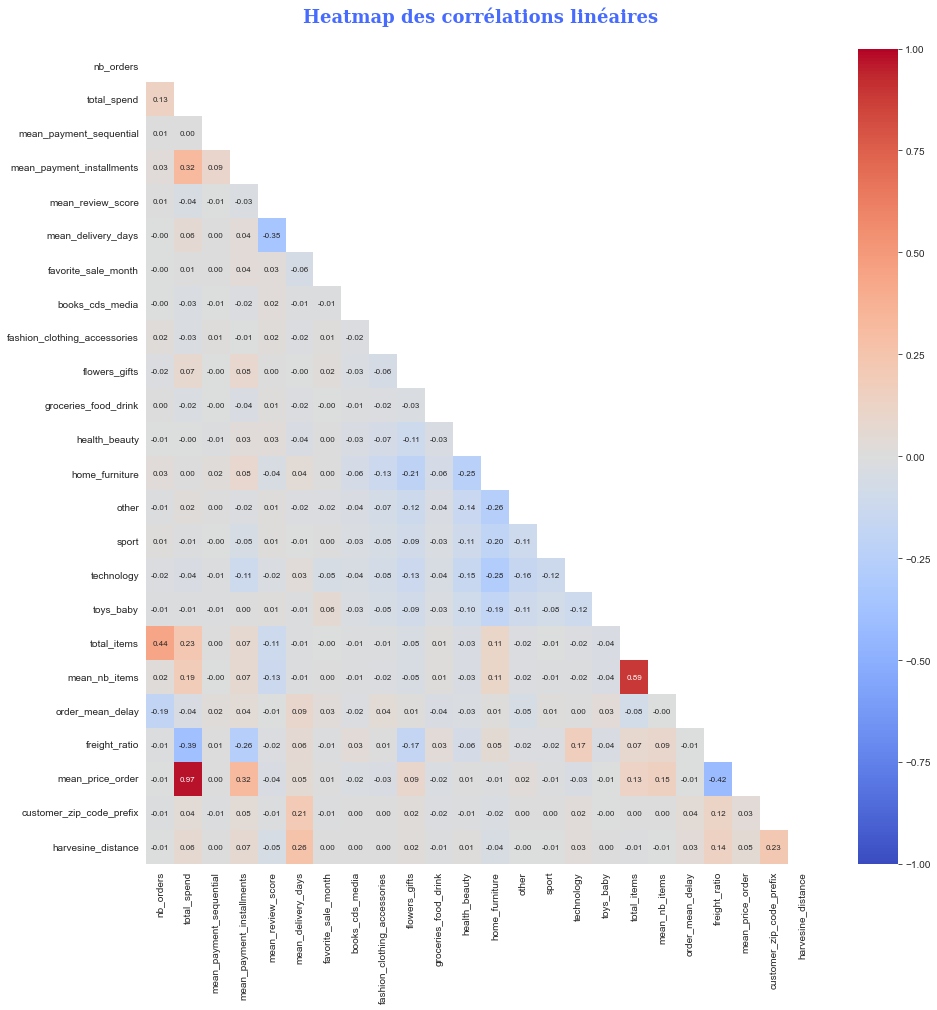

In [180]:
corr = df_olist.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (15,15))

ax = sns.heatmap(corr, annot = True,
                 vmin = -1, vmax = 1,
                 fmt = ".2f", annot_kws = {'size':8}, 
                 mask = mask, 
                 center = 0, 
                 cmap = "coolwarm")

plt.title(f"Heatmap des corrélations linéaires\n", fontdict = font_title)

plt.show()

### V.Export des données 

In [182]:
df_olist_test.to_csv("./datasets/olist_customers_segmentation_test.csv")